# COVID-19 Data Cleaning and Visualization

## Data Cleaning

The data sets used in this notebook is Covid-19 data set in Indonesia and universe from January 2020 to June 2020. Each has confirmed, recovered, and death time-series data.

1. Import library and data sets

In [66]:
'''Step 1: Import the data'''
import pandas as pd
import matplotlib.pyplot as plt

dfc = pd.read_csv("time_series_covid19_confirmed_global.csv") #confirmed
dfr = pd.read_csv("time_series_covid19_recovered_global.csv") #recovered
dfd = pd.read_csv("time_series_covid19_deaths_global.csv") #deaths


print(dfc.head())

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/12/20  6/13/20  6/14/20  6/15/20  \
0        0        0        0  ...    23546    24102    24766    25527   
1        0        0        0  ...     1416     1464     1521     1590   
2        0        0        0  ...    10698    10810    10919    11031   
3        0        0        0  ...      853      853      853      853   
4        0        0        0  ...      130      138      140      142   

   6/16/20  6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  
0    26310    26874   

2. Delete the "Province/State" column

In [9]:
del dfc['Province/State']
del dfr['Province/State']
del dfd['Province/State']

3. Check the dataframe shape as there will be a combined dataframe

In [12]:
print(dfc.shape)
print(dfr.shape)
print(dfd.shape)

(266, 155)
(253, 155)
(266, 155)


3a. Check the intersection (of the same country)

In [15]:
compares = set(dfc['Country/Region']).intersection(set(dfr['Country/Region']))
print(compares)
print(len(compares))

{'Cuba', 'Timor-Leste', 'Qatar', 'Namibia', 'Kuwait', 'Kazakhstan', 'Brunei', 'Guinea-Bissau', 'Romania', "Cote d'Ivoire", 'New Zealand', 'Botswana', 'Yemen', 'Argentina', 'Mexico', 'Uganda', 'Grenada', 'Algeria', 'Malaysia', 'Chile', 'Sri Lanka', 'Djibouti', 'Guyana', 'South Africa', 'Albania', 'Bangladesh', 'Malawi', 'Italy', 'Gambia', 'Croatia', 'Zimbabwe', 'Vietnam', 'Mozambique', 'Gabon', 'Lithuania', 'Saint Kitts and Nevis', 'Iran', 'France', 'MS Zaandam', 'Georgia', 'Central African Republic', 'Libya', 'Andorra', 'Oman', 'Singapore', 'Antigua and Barbuda', 'Germany', 'Suriname', 'Cabo Verde', 'San Marino', 'Cameroon', 'Azerbaijan', 'Bosnia and Herzegovina', 'Benin', 'China', 'Saint Lucia', 'Honduras', 'Laos', 'Liberia', 'Saudi Arabia', 'Paraguay', 'Greece', 'Niger', 'Somalia', 'Holy See', 'Monaco', 'Netherlands', 'Madagascar', 'Tanzania', 'Seychelles', 'Colombia', 'Ireland', 'Ethiopia', 'Jamaica', 'Peru', 'West Bank and Gaza', 'Israel', 'Sierra Leone', 'Mali', 'Nicaragua', 'Swed

In [17]:
compares = set(dfc['Country/Region']).union(set(dfr['Country/Region']))
print(len(compares))
print(dfc['Country/Region'].unique())

188
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, South' 'Kuwait'
 'Kyrgyzstan' 'Latvia' 'Lebanon

3b. Check the dataframe, which index has different data between dfc and dfr

In [22]:
list_aneh = []
def cekdata(a, b):
    for i in range(len(b)):
        if (a.iloc[i]['Country/Region']) != (b.iloc[i]['Country/Region']):
            list_aneh.append(i)
    return list_aneh

cek_aneh = cekdata(dfc, dfr)
print(cek_aneh, len(cek_aneh))

[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252] 180


3c. What is the 'different' data?

In [24]:
list_cekal = []
all_cekal = []
for c in range(len(cek_aneh)):
    list_cekal = dfc.iloc[[cek_aneh[c]]]['Country/Region'].values.tolist(), dfr.iloc[[cek_aneh[c]]]['Country/Region'].values.tolist() # ambil nilai terus dimasukin ke list: .values.tolist()
    all_cekal.append(list_cekal)
print(all_cekal)

[(['Benin'], ['Belize']), (['Bhutan'], ['Benin']), (['Bolivia'], ['Bhutan']), (['Bosnia and Herzegovina'], ['Bolivia']), (['Brazil'], ['Bosnia and Herzegovina']), (['Brunei'], ['Brazil']), (['Bulgaria'], ['Brunei']), (['Burkina Faso'], ['Bulgaria']), (['Cabo Verde'], ['Burkina Faso']), (['Cambodia'], ['Cabo Verde']), (['Cameroon'], ['Cambodia']), (['Canada'], ['Cameroon']), (['Canada'], ['Central African Republic']), (['Canada'], ['Chad']), (['Canada'], ['Chile']), (['Canada'], ['China']), (['Canada'], ['China']), (['Canada'], ['China']), (['Canada'], ['China']), (['Canada'], ['China']), (['Canada'], ['China']), (['Central African Republic'], ['China']), (['Chad'], ['China']), (['Chile'], ['China']), (['China'], ['Colombia']), (['China'], ['Congo (Brazzaville)']), (['China'], ['Congo (Kinshasa)']), (['China'], ['Costa Rica']), (['China'], ["Cote d'Ivoire"]), (['China'], ['Croatia']), (['China'], ['Diamond Princess']), (['China'], ['Cuba']), (['China'], ['Cyprus']), (['Colombia'], ['Cze

In [25]:
# Check whether Belize is contained in dfc or not
listb = dfc['Country/Region'].values
print('Belize' in listb)

True


3d. Suspect: Data is not sorted. Do sorting.

In [26]:
dfc.sort_values('Country/Region', inplace=True) #inplace True: adata diganti di df itu langsung
print(dfc.head(20))

         Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
0           Afghanistan  33.0000   65.0000        0        0        0   
1               Albania  41.1533   20.1683        0        0        0   
2               Algeria  28.0339    1.6596        0        0        0   
3               Andorra  42.5063    1.5218        0        0        0   
4                Angola -11.2027   17.8739        0        0        0   
5   Antigua and Barbuda  17.0608  -61.7964        0        0        0   
6             Argentina -38.4161  -63.6167        0        0        0   
7               Armenia  40.0691   45.0382        0        0        0   
15            Australia -31.9505  115.8605        0        0        0   
14            Australia -37.8136  144.9631        0        0        0   
13            Australia -41.4545  145.9707        0        0        0   
12            Australia -34.9285  138.6007        0        0        0   
10            Australia -12.4634  130.8456        0

In [28]:
# make sure the indexing is perfectly sorted
dfc.index = range(len(dfc.index))
print(dfc.head(10))
print(dfc.tail(4))

        Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0          Afghanistan  33.0000   65.0000        0        0        0        0   
1              Albania  41.1533   20.1683        0        0        0        0   
2              Algeria  28.0339    1.6596        0        0        0        0   
3              Andorra  42.5063    1.5218        0        0        0        0   
4               Angola -11.2027   17.8739        0        0        0        0   
5  Antigua and Barbuda  17.0608  -61.7964        0        0        0        0   
6            Argentina -38.4161  -63.6167        0        0        0        0   
7              Armenia  40.0691   45.0382        0        0        0        0   
8            Australia -31.9505  115.8605        0        0        0        0   
9            Australia -37.8136  144.9631        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  6/12/20  6/13/20  6/14/20  6/15/20  \
0        0        0        0  ...  

4. Do similar steps to dfr

In [37]:
dfr.sort_values('Country/Region', inplace=True) #inplace True: adata diganti di df itu langsung
dfr.index = range(len(dfr.index))
print(dfr.head(10))

        Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0          Afghanistan  33.0000   65.0000        0        0        0        0   
1              Albania  41.1533   20.1683        0        0        0        0   
2              Algeria  28.0339    1.6596        0        0        0        0   
3              Andorra  42.5063    1.5218        0        0        0        0   
4               Angola -11.2027   17.8739        0        0        0        0   
5  Antigua and Barbuda  17.0608  -61.7964        0        0        0        0   
6            Argentina -38.4161  -63.6167        0        0        0        0   
7              Armenia  40.0691   45.0382        0        0        0        0   
8            Australia -35.4735  149.0124        0        0        0        0   
9            Australia -33.8688  151.2093        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  6/12/20  6/13/20  6/14/20  6/15/20  \
0        0        0        0  ...  

5. Merge rows with the same country name by averaging the lattitude and longitude.

In [30]:
print(dfc.loc[dfc['Country/Region'] == 'Australia']) # for example australia

   Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  1/25/20  \
8       Australia -31.9505  115.8605        0        0        0        0   
9       Australia -37.8136  144.9631        0        0        0        0   
10      Australia -41.4545  145.9707        0        0        0        0   
11      Australia -34.9285  138.6007        0        0        0        0   
12      Australia -12.4634  130.8456        0        0        0        0   
13      Australia -33.8688  151.2093        0        0        0        0   
14      Australia -35.4735  149.0124        0        0        0        0   
15      Australia -28.0167  153.4000        0        0        0        0   

    1/26/20  1/27/20  1/28/20  ...  6/12/20  6/13/20  6/14/20  6/15/20  \
8         0        0        0  ...      602      602      602      602   
9         1        1        1  ...     1703     1720     1732     1741   
10        0        0        0  ...      228      228      228      228   
11        0        

In [32]:
# sum the number of case per date
ausie = dfc.loc[dfc['Country/Region'] == 'Australia'].sum()[3:] #menjumlahkan dari tanggal (kolom ke3)
print(ausie) #berisi data jumlah terkonfirmasi per tanggalnya (untuk australia)

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       4
           ... 
6/17/20    7391
6/18/20    7409
6/19/20    7411
6/20/20    7461
6/21/20    7474
Length: 152, dtype: object


In [34]:
# averaging lattitude dan longitude
latitude = dfc.loc[dfc['Country/Region'] == 'Afghanistan'].mean().values.tolist()
print(latitude)

[33.0, 65.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 5.0, 7.0, 7.0, 7.0, 11.0, 16.0, 21.0, 22.0, 22.0, 22.0, 24.0, 24.0, 40.0, 40.0, 74.0, 84.0, 94.0, 110.0, 110.0, 120.0, 170.0, 174.0, 237.0, 273.0, 281.0, 299.0, 349.0, 367.0, 423.0, 444.0, 484.0, 521.0, 555.0, 607.0, 665.0, 714.0, 784.0, 840.0, 906.0, 933.0, 996.0, 1026.0, 1092.0, 1176.0, 1279.0, 1351.0, 1463.0, 1531.0, 1703.0, 1828.0, 1939.0, 2171.0, 2335.0, 2469.0, 2704.0, 2894.0, 3224.0, 3392.0, 3563.0, 3778.0, 4033.0, 4402.0, 4687.0, 4963.0, 5226.0, 5639.0, 6053.0, 6402.0, 6664.0, 7072.0, 7653.0, 8145.0, 8676.0, 9216.0, 9998.0, 10582.0, 11173.0, 11831.0, 12456.0, 13036.0, 13659.0, 14525.0, 15205.0, 15750.0, 16509.0, 17267.0, 18054.0, 18969.0, 19551.0, 20342.0, 20917.0, 21459.0, 22142.0, 22890.0, 23546.0, 24102.0, 24766.0, 25527.0, 26

6. Make a function to make dataframe more organized (dfc, dfr, and dfd)

In [38]:
def hitungSum(dfx, idx):
    nama_negara = list(dfx[idx].unique())
    latitude = []
    longitude= []
    per_negara = [] # data seluruh negara per hari
    all_negara = []
    
    for i in nama_negara:
        latitude = dfx.loc[dfc['Country/Region'] == i, 'Lat'].mean()
        longitude = dfx.loc[dfc['Country/Region'] == i, 'Long'].mean()
        
        per_negara = dfx.loc[dfx[idx] == i].sum()[3:].values.tolist()
        
        per_negara.insert(0, i) # indeks ke-0 diisi dengan nama negara
        per_negara.insert(1, latitude) # diisi dengan lat 
        per_negara.insert(2, longitude) # diisi dengan long
        
        all_negara.append(per_negara)
        
    return all_negara

headerdf = dfc.columns.values.tolist() # berisi nama kolom dari dfc
dfc_bersih = pd.DataFrame(hitungSum(dfc, 'Country/Region'), columns=headerdf) # nama columns diisi dengan headerdf
dfr_bersih = pd.DataFrame(hitungSum(dfr, 'Country/Region'), columns=headerdf)
dfd_bersih = pd.DataFrame(hitungSum(dfd, 'Country/Region'), columns=headerdf)

print(dfc_bersih.shape, dfr_bersih.shape, dfd_bersih.shape)

(188, 155) (188, 155) (188, 155)


5a. Check whether Null data exist

In [40]:
print(dfc.isna().sum())
dfc_bersih.dropna(inplace=True)
dfr_bersih.dropna(inplace=True)
dfd_bersih.dropna(inplace=True)

print(dfc_bersih.shape, dfr_bersih.shape, dfd_bersih.shape)

Country/Region    0
Lat               0
Long              0
1/22/20           0
1/23/20           0
                 ..
6/17/20           0
6/18/20           0
6/19/20           0
6/20/20           0
6/21/20           0
Length: 155, dtype: int64
(188, 155) (179, 155) (188, 155)


6. Make customized dataframe of Indonesia

In [43]:
list_date = dfc_bersih.columns.values.tolist()[3:]
print(len(list_date))

# menggabungkan data confirmed, recovered, dan death menjadi dataframe baru untuk Indonesia
conf_id = dfc_bersih[dfc_bersih['Country/Region'] == 'Indonesia'].values[0].tolist()[3:]
rec_id = dfr_bersih[dfr_bersih['Country/Region'] == 'Indonesia'].values[0].tolist()[3:]
death_id = dfd_bersih[dfd_bersih['Country/Region'] == 'Indonesia'].values[0].tolist()[3:]

case_id = list((list_date, conf_id, rec_id, death_id))

152


In [44]:
# transform to dataframe
df_id = pd.DataFrame(case_id).T # T for Transpose
df_id.columns = ['Tanggal', 'Positif', 'Sembuh', 'Meninggal']
df_id.set_index('Tanggal', inplace=True)
print(df_id.tail(10))

        Positif Sembuh Meninggal
Tanggal                         
6/12/20   36406  13213      2048
6/13/20   37420  13776      2091
6/14/20   38277  14531      2134
6/15/20   39294  15123      2198
6/16/20   40400  15703      2231
6/17/20   41431  16243      2276
6/18/20   42762  16798      2339
6/19/20   43803  17349      2373
6/20/20   45029  17883      2429
6/21/20   45891  18404      2465


In [46]:
# convert to csv
df_id.to_csv("Data_Covid_ID.csv")

7. Make customized dataframe of Global

In [48]:
sum_c = dfc_bersih.sum()[3:].values.tolist() #data positif per hari seluruh dunia
sum_r = dfr_bersih.sum()[3:].values.tolist() #data positif per hari seluruh dunia
sum_d = dfd_bersih.sum()[3:].values.tolist() #data positif per hari seluruh dunia
print(type(sum_c))
print(sum_c)

<class 'list'>
[555, 654, 941, 1434, 2118, 2927, 5578, 6166, 8234, 9927, 12038, 16787, 19881, 23892, 27635, 30794, 34391, 37120, 40150, 42762, 44802, 45221, 60368, 66885, 69030, 71224, 73258, 75136, 75639, 76197, 76819, 78572, 78958, 79525, 80372, 81346, 82704, 84070, 85967, 88325, 90262, 92795, 95075, 97844, 101761, 105782, 109754, 113536, 118375, 125704, 130909, 145204, 156283, 167022, 181452, 196917, 216161, 243084, 272698, 304844, 337597, 378381, 418569, 468155, 530138, 594178, 661544, 720695, 783580, 858317, 933905, 1014713, 1097193, 1177447, 1251123, 1322598, 1397537, 1481490, 1567423, 1659674, 1737813, 1836615, 1906692, 1977287, 2057584, 2153578, 2242537, 2316591, 2399451, 2472264, 2546905, 2622750, 2711635, 2799064, 2884420, 2958352, 3027215, 3101078, 3176596, 3261450, 3349915, 3432050, 3511157, 3587874, 3668635, 3760836, 3851895, 3945002, 4030363, 4108270, 4184838, 4268247, 4353211, 4451126, 4548549, 4641727, 4721968, 4810315, 4906193, 5005761, 5112366, 5220585, 5321022, 54173

7a. Daily confirmed/recovered/death data

In [50]:
df_total = pd.DataFrame(list((list_date, sum_c, sum_r, sum_d))).T
df_total.columns = ["Tanggal", "Positif", "Sembuh", "Meninggal"]
df_total.set_index("Tanggal",inplace=True)
print(df_total.head())
df_total.to_csv("Data_Seluruh_Dunia.csv")

        Positif Sembuh Meninggal
Tanggal                         
1/22/20     555     28        17
1/23/20     654     30        18
1/24/20     941     36        26
1/25/20    1434     39        42
1/26/20    2118     52        56


## Data Visualization

1. Import dataset

In [52]:
df_id = pd.read_csv("Data_Covid_ID.csv")
df_total = pd.read_csv("Data_Seluruh_Dunia.csv")

2. Tryout visualization

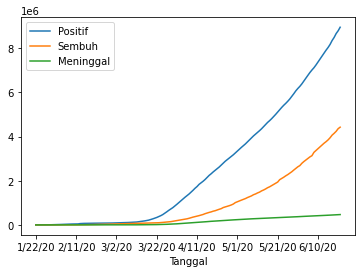

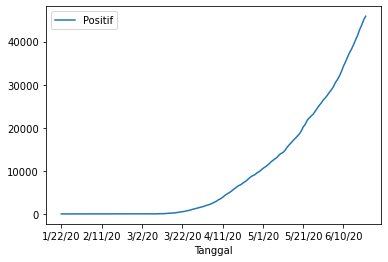

In [54]:
df_total.plot(x="Tanggal")
df_id.plot(x="Tanggal", y="Positif")

3. Make comparison to several countries

        Negara  Latitude  Longitude  Positif  Sembuh  Meninggal
0  Afghanistan   33.0000    65.0000    28833    8764        581
1      Albania   41.1533    20.1683     1962    1134         44
2      Algeria   28.0339     1.6596    11771    8422        845
3      Andorra   42.5063     1.5218      855     792         52
4       Angola  -11.2027    17.8739      183      77          9
          Negara  Latitude  Longitude  Positif  Sembuh  Meninggal
80     Indonesia   -0.7893   113.9213    45891   18404          9
107     Malaysia    2.5000   112.5000     8572    8156         22
135  Philippines   13.0000   122.0000    30052    7893        109
152    Singapore    1.2833   103.8333    42095   34942       1012


<Figure size 720x720 with 0 Axes>

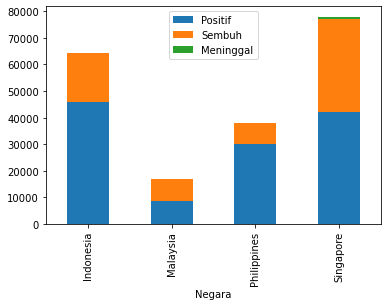

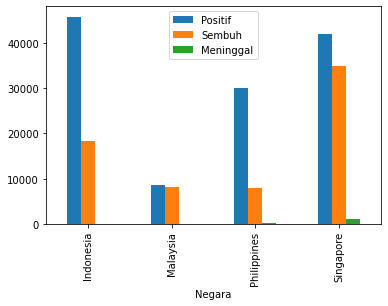

In [55]:
plt.figure(figsize=(10, 10))
banding = df_global[df_global["Negara"].isin(["Indonesia", "Singapore", "Malaysia", "Philippines"])]
print(df_global.head())
print(banding.head())
banding.plot.bar(x="Negara", y=["Positif", "Sembuh", "Meninggal"], stacked=True)
banding.plot.bar(x="Negara", y=["Positif", "Sembuh", "Meninggal"])

In [56]:
new_df_id = df_id.copy()
new_df_id['Hari'] = range(len(df_id))

(array([[16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 7.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  3.,  9.,  3.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  4.,  7.,  4.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  3.,  4.,  4.,  5.]]),
 array([  0. ,  15.1,  30.2,  45.3,  60.4,  75.5,  90.6, 105.7, 120.8,
        135.9, 151. ]),
 array([    0. ,  4589.1,  9178.2, 13767.3, 18356.4, 22945.5, 27534.6,
        32123.7, 36712.8, 41301.9, 45891. ]),
 <matplotlib.collections.QuadMesh at 0x22f86fa4048>)

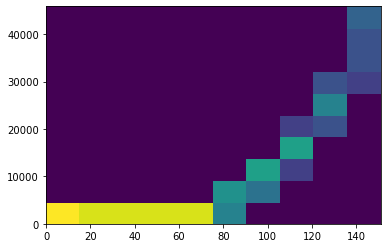

In [58]:
# histogram
x = new_df_id['Hari']
y = new_df_id['Positif']
plt.hist2d(x, y)

4. Showing top five data

In [59]:
def teratas(df, col, n):
    df_temp = df.sort_values(col, ascending=False)
    return df_temp[:n]

positif = teratas(df_global, "Positif", 30)
sembuh = teratas(df_global, "Sembuh", 30)
meninggal = teratas(df_global, "Meninggal", 30)

positif.set_index("Negara",inplace=True)
sembuh.set_index("Negara",inplace=True)
meninggal.set_index("Negara",inplace=True)

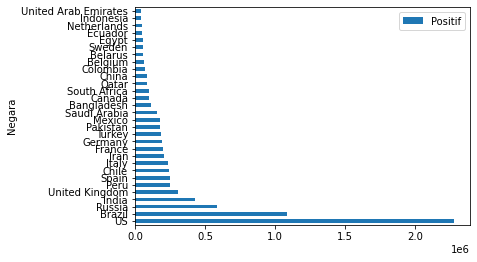

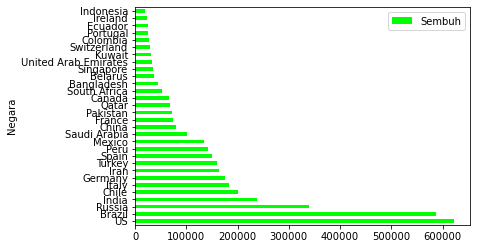

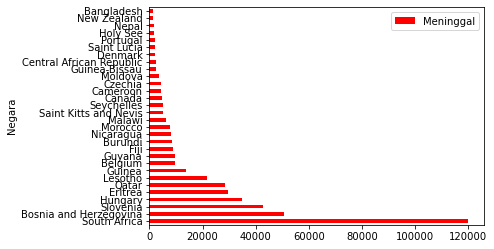

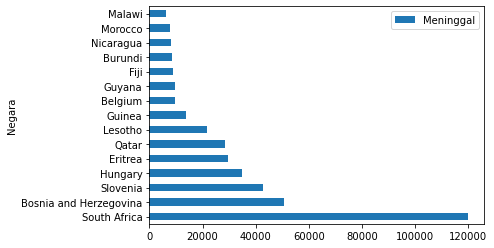

In [60]:
positif.plot.barh(y='Positif')
sembuh.plot.barh(y='Sembuh', color='lime')
meninggal.plot.barh(y='Meninggal', color='red')

# Top 5
meninggal[:15].plot.barh(y='Meninggal')

5. Calculating ratio

In [61]:
list_total = [df_total.iloc[-1]['Positif'], df_total.iloc[-1]['Sembuh'], df_total.iloc[-1]['Meninggal']]
list_rasio = [df_global['Negara'], df_global['Positif'].apply(lambda x: 100*x/list_total[0]),
              df_global['Sembuh'].apply(lambda x: 100*x/list_total[1]),
              df_global['Meninggal'].apply(lambda x: 100*x/list_total[2])]
df_rasio = pd.DataFrame(list_rasio).T
print(df_rasio.head())

        Negara     Positif      Sembuh   Meninggal
0  Afghanistan    0.322069    0.198002    0.124058
1      Albania   0.0219158     0.02562  0.00939506
2      Algeria    0.131484    0.190275    0.180428
3      Andorra  0.00955048   0.0178934   0.0111033
4       Angola  0.00204414  0.00173963  0.00192172


6. Plot Venn diagram to have a look which countries has the highest number of recovered cases but also has highest number of confirmed cases.

In [ ]:
#from matplotlib_venn import venn3

#A = set(positif.index.values.tolist()) #30 besar 
#B = set(sembuh.index.values.tolist())
#C = set(meninggal.index.values.tolist())

#diagram_venn = venn3([A, B, C], set_labels=(['Positif', 'Sembuh', 'Meninggal']))
#plt.title('Perbandingan jumlah negara waspada copid')
#plt.show()

#A.intersection(B, C) # negara dengan peningkatan covid tercepat
###Operasi dalam set
#B-A #negara yg jumlah positif masuk 20 besar tapi masuk 20 teratas
#B-(A|C) #engara yang jumlah positif + meninggalnya tidak masuk 20 besar tapi sembuh masuk teratas : tingkat kesembuhan tinggi

7. Importing seaborn

In [ ]:
import seaborn as sns
#default scatter
g = sns.lmplot(x='Longitude',  y='Positif', data=df_global)
g2 = sns.lmplot(x='Longitude',  y='Positif', data=df_global,
                fit_reg=False,
                hue='Meninggal')
g2._legend.remove()

plt.scatter(x = df_global['Longitude'],
            y = df_global['Latitude'],
            s = df_global['Positif']*0.005,
            alpha = 0.4,
            edgecolors = 'w')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Positif berdasarkan longitude dan latitude')